Mestrado em Modelagem Matematica da Informacao
----------------------------------------------
Disciplina: Modelagem e Mineracao de Dados
------------------------------------------

Master Program - Mathematical Modeling of Information
-----------------------------------------------------
Course: Data Mining and Modeling
--------------------------------

Professor: Renato Rocha Souza
-----------------------------

### Topic: Twitter Analysis and Visualization

Information on the Python Packages used:  
https://github.com/bear/python-twitter (before was http://code.google.com/p/python-twitter/)  
https://dev.twitter.com/docs  
http://networkx.lanl.gov/  
http://docs.python.org/library/re.html  
http://nltk.org/  
http://docs.python.org/library/xmlrpclib.html  
http://docs.python.org/library/webbrowser.html  
http://docs.python.org/library/codecs.html  
http://matplotlib.sourceforge.net/  
http://numpy.scipy.org/  
http://docs.python.org/library/itertools.html  
http://docs.python.org/library/sys.html  
http://docs.python.org/library/json.html  
http://docs.python.org/library/os  
https://pypi.python.org/pypi/basemap/1.0.7  
http://matplotlib.org/basemap/  
http://matplotlib.org/basemap/users/installing.html  

In [65]:
from __future__ import division
import twitter
import nltk
import re
import networkx as nx
import sys
import os
import json
import webbrowser
import codecs
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, HTML, IFrame, FileLink, FileLinks #needed to render in notebook
from IPython.core.display import display
import pydot  #Install http://www.graphviz.org/ & https://pypi.python.org/pypi/pydot2/1.0.32 pydot --> pip install pydot2

%matplotlib inline
# Set default figure size for this notebook
plt.rcParams['figure.figsize'] = (16.0, 12.8)

#### Specifying the path to the files

In [81]:
templates = "/home/rsouza/Dropbox/Renato/ModMinDados/Git/templates/"
outputs = "/home/rsouza/Dropbox/Renato/ModMinDados/outputs/"

dotfile = "graph_retweet.dot"
pngfile = "graph_retweet.png"
protofile = "graph_retweet.html"
tweetsfile = "Tweets_dump.txt"
template_proto = 'template_protoviz.html'

pathdotfile = os.path.join(outputs,dotfile)
pathpngfile = os.path.join(outputs,pngfile)
pathprotofile = os.path.join(outputs,protofile)
pathtweetsfile = os.path.join(outputs,tweetsfile)
pathtemplate = os.path.join(templates,template_proto)

stoplist_en = nltk.corpus.stopwords.words('english')
stoplist_pt = nltk.corpus.stopwords.words('portuguese')
ignorewords = stoplist_en + stoplist_pt + ['',' ','-','rt']

twitter_query = u'Earth'

Twitter API Keys  
Please generate yours...  
Go to http://twitter.com/apps/new to create an app and get these items  
See https://dev.twitter.com/docs/auth/oauth for more information on Twitter's OAuth implementation  
https://dev.twitter.com/rest/reference/get/account/verify_credentials  
https://dev.twitter.com/docs/auth/oauth  
https://dev.twitter.com/apps/new  

In [82]:
with open('twitter_tokens.txt', 'r') as twitter_tokens:
    tokens = twitter_tokens.read().split(',')
consumer_key = tokens[0].strip()
consumer_secret = tokens[1].strip()
access_token = tokens[2].strip()
access_token_secret = tokens[3].strip()

Acessing Twitter (with or without authentication)

In [83]:
#api = twitter.Api() # Accessing with no authentication
api = twitter.Api(consumer_key, consumer_secret, access_token, access_token_secret)

In [84]:
print api.VerifyCredentials()

{"created_at": "Thu Apr 09 10:44:07 +0000 2009", "description": "Researcher and Professor", "favourites_count": 1, "followers_count": 487, "friends_count": 130, "id": 29959702, "lang": "en", "listed_count": 21, "location": "Rio de Janeiro", "name": "Renato Rocha Souza", "profile_background_color": "9AE4E8", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/33941499/8.jpg", "profile_background_tile": false, "profile_image_url": "https://pbs.twimg.com/profile_images/503088023/Renato2_normal.JPG", "profile_link_color": "0084B4", "profile_sidebar_fill_color": "DDFFCC", "profile_text_color": "333333", "protected": false, "screen_name": "rrsouza", "status": {"created_at": "Mon Jan 05 11:05:11 +0000 2015", "favorited": false, "hashtags": ["FGV", "emap"], "id": 552058220781797376, "lang": "und", "retweeted": false, "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>", "text": "http://t.co/5l4lGVKiBG #FGV #emap", "truncated": false, "u

#### Lexical Analysis

Recent (random) public messages

In [85]:
msgpublicas = api.GetStreamSample()

In [86]:
for i in range(15):
    tweet = msgpublicas.next()
    if tweet.has_key('text'):
        print(u'{}\n'.format(tweet['text']))

RT @tay1o: real nigga so I keep real niggas with me

Randomly thinks about that one time @ashleylikewoe made a cup of noodles and instead of food there was spider webs inside hahahha

Terminar de comer... Tener 15 correos nuevos por atender. #Plop

RT @ShathaSa3eed: بعضهم كما الخرافات كل شيء لامنطقي موجود
وكما الاحلام لا متوقعة و لا معقولة

RT @kpopgames_12: من الالطف ؟
Who's the cutest boy?
 V,  RT
Taeil,  FAV http://t.co/Umw6GmvXS8

RT @oniezza: kamu belajar gih sana!! | belajar apa? | belajar terima kenyataan kalo kita itu jodoh.  #ONDHELL

RT @Conselhos: Se for pra pedir desculpa e fazer de novo, é melhor nem pedir. 😉

RT @AlkaabiSaeed92: هههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههه😂😂😂😂😂😂😂😂😂 لا بس تذكرت اني حاسم الدوري و التأهل و مبار…

Don't tell me im a hearthbreaker

4/25・26、モンストがニコニコ超会議2015に参戦！「マックスむらい VS 降臨！横綱 国宝」やオーディションで選ばれた'M4（モンストうまい4人組）'が新超絶「摩利支天」に挑戦など盛り沢山！オーブプレゼントもあるよ！ #モンスト http://t.co/0pLydi3vME

Men have also been dominating the elements with rel

Tweet Structure

In [87]:
while True:
    tweet = msgpublicas.next()
    if tweet.has_key('user'):
        break
tweet

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Wed Apr 22 19:55:08 +0000 2015',
 u'entities': {u'hashtags': [],
  u'symbols': [],
  u'trends': [],
  u'urls': [],
  u'user_mentions': []},
 u'favorite_count': 0,
 u'favorited': False,
 u'filter_level': u'low',
 u'geo': None,
 u'id': 590967090468782080,
 u'id_str': u'590967090468782080',
 u'in_reply_to_screen_name': None,
 u'in_reply_to_status_id': None,
 u'in_reply_to_status_id_str': None,
 u'in_reply_to_user_id': None,
 u'in_reply_to_user_id_str': None,
 u'lang': u'en',
 u'place': None,
 u'possibly_sensitive': False,
 u'retweet_count': 0,
 u'retweeted': False,
 u'source': u'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 u'text': u'Back to the drawing board',
 u'timestamp_ms': u'1429732508662',
 u'truncated': False,
 u'user': {u'contributors_enabled': False,
  u'created_at': u'Thu Feb 16 18:50:28 +0000 2012',
  u'default_profile': True,
  u'default_profile_image': False,
  u'descrip

In [88]:
Image(url='http://mike.teczno.com/img/raffi-krikorian-map-of-a-tweet.png')

Recent messages from an user

In [89]:
msguser = api.GetUserTimeline(tweet['user']['id'])
print([s.text for s in msguser])

[u'Back to the drawing board', u'Fuck. Hair got cut too short', u"It's about time to start hitting the driving range again", u'Walking around in shorts and a tank, and I see people walking around in jeans and jackets', u'Getting sick when the weather gets nice is fun', u'@briannagiorgio or two, or a few \U0001f37b', u'I need a drink', u'Easter leftovers for my next 10 meals. Breakfast, lunch, and dinner', u'@Chris_Mini http://t.co/bDv0rNJfe1', u'Phone going under the knife for the fourth time. Second screen job', u"Just cracked my screen and I'm not even drinking yet. Happy St. Patricks's Day", u'Last syllabus Eve.', u"It's fucking gorgeous out", u"I've got that wanderlust feeling again", u'Chocolate coconut protein powder + almond milk = liquid almond joy \U0001f44d', u'Gotta get back on track this next week', u'No yeah I love waking up at 4:30 to be at work at 530 on the exact day that is also lose an hour of sleep', u'Only one term of school left now.. Slowly freaking out', u'I stil

Recent messages from the authenticated user

In [90]:
msguser = api.GetUserTimeline('rrsouza')
#msguser = api.GetUserTimeline('29959702')
print([s.text for s in msguser])

[u'http://t.co/5l4lGVKiBG #FGV #emap', u'Ol\xe1 Pessoal! Fiquem atentos \xe0 aula de Modelagem e Minera\xe7\xe3o de Dados... Hoje an\xe1lises com Twitter!', u'Mais um curioso fen\xf4meno dos nossos tempos: #LeakForJLaw Or maybe #LeakForPerverts ?', u'RT @mashable: 8 Brutally Honest Facebook Notifications That Need to Exist Now http://t.co/wwFQ1hut9x http://t.co/b2GjxcNb6D', u'#Cite10CoisasQueSuaM\xe3eFala come alguma coisa antes para n\xe3o chegar na festa esfomeado', u'Implica\xe7\xf5es do Big Data para as quest\xf5es de privacidade: http://t.co/WDJwxpOr9d', u'Resultados da sele\xe7\xe3o do Mestrado em Modelagem Matem\xe1tica da Informa\xe7\xe3o - turma 2013 saem nesta sexta, 08/02. #FGV #EMAp', u'RT @PyPLN: We just released the very first version (0.1.0) of pypln.api -- a Python library to programatically access @PyPLN Web! http:/ ...', u"Men's Fitness UK by Dennis Publishing Ltd http://t.co/y8YZBBeP", u"I'm at Capes (Bras\xedlia, DF) w/ 2 others http://t.co/QiukVJqW", u"I'm at Capes

In [91]:
hometimeline = api.GetHomeTimeline()
print([u.GetText() for u in hometimeline])

[u'#Google Fooled By Its Own April Fool Prank http://t.co/Tumn0OYaZv', u"Left Shark is now a character in 'World of Warcraft.' You read that right. http://t.co/etaOJ3NYzl", u'RT @wired_business: Using Satellites To Stop Forest Destruction in its Tracks http://t.co/fBV5ARcLCR An Earth Day special by @klintron http\u2026', u'RT @TIMEHealth: An experimental Ebola drug shows more promise http://t.co/tK9mnsxt75', u'RT @ConnerForrest: Google Chrome Live: What you need to know http://t.co/hMaA5XjgIO', u"When Planned Parenthood's Cecile Richards met David Koch http://t.co/ulvm6nhOeu", u'Amazon tests delivery to trunks of Audi cars in Munich, Germany http://t.co/fMJ88auJf5 http://t.co/VjTEtixkUY', u'Over 300 Artists Link Up in an International Game of Telephone http://t.co/UN03TRUcxs #art #plevycom http://t.co/50qGYhVIQE', u'Facebook says "Hello" with a new dialer app for Android phones http://t.co/w1Ykn1cPfW http://t.co/3Q4wHaRwr7', u"The 8 best things that happened at the #TIME100 Gala (inclu

In [92]:
search = api.GetSearch(twitter_query)
print([s.text for s in search])

[u'We need to care for the earth so that it may continue, as God willed, to be a source of life for the entire human family.', u"So I guess it's earth day? Hell yeah go world!", u"It's #EarthDay! Celebrate &amp; share pics of your favorite place on Earth. Tag #NoPlaceLikeHome: http://t.co/Sm3v26J4mo http://t.co/aMG0h483XK", u'RT @LiveScience: Earth Day 2015: Our Favorite Photos of the Planet #EarthDay #NoPlaceLikeHome http://t.co/XhNgkr5iUc http://t.co/fJAJnkzBix', u'Pres Obama delivering Earth Day remarks to invited audience in the Everglades. http://t.co/DBgBQ2uKAd', u"RT @zachsnacks: earth day is cool and all but the thing is I have allergies I'm not about to go and embrace the grass", u'RT @KristenBaldacci: The same people who "appreciate the earth" today do this shit at south beach, happy earth day from Miami xoxo :-) http\u2026', u'I love the grass, I love the water, I love every tree, every flower, I love the weather, i love the fruit the earth gives me', u'Family Five: Earth Da

After authentication, more options are available

In [93]:
userfollow = api.GetFriends()
print([u.name for u in userfollow])

[u'Cl\xe1udio Berrondo', u'Fl\xe1vio Amieiro', u'Pablo Cerdeira', u'Cut the Rope', u'Machinalis', u'MiningTheSocialWeb', u'CNET News', u'ReadWrite', u'The Next Web', u'CNET', u'The Verge', u'Engadget', u'Lifehacker', u'Gizmodo', u'WIRED', u'TechCrunch', u'Ian Ozsvald', u'CNPq', u'Claudio Gnoli', u'strongsteam', u'Diana Maynard', u'Joyce Figueir\xf3', u'\xc1lvaro Justen', u'PyPLN', u'LINUX For You', u'TechRepublic', u'ZDNet', u'Twitter API', u'Udacity', u'Clarissa', u'Roberto R.S.Sobrinho', u'Luana Sales', u'Sensacionalista', u'Andr\xe9 Branco', u'CMA', u'Asla S\xe1', u'Renata Teixeira', u'FGV EMAp', u'FGV', u'FGV Marketing', u'CPDOC', u'Globant Brasil', u'Sheffield NLP', u'D\xe9bora Pereira', u'Andr\xe9 Andrade', u"O'Reilly Radar", u'Virgilio Almeida', u'Dalai Lama', u'Alexandre Colucci', u'Benildes Maculan', u'Gabriel Rezende', u'Mashable', u'alfredo hirsch', u'Fernando S Parreiras', u'NYTimes Bits', u'MiniCursos', u'Googleverse', u'Hootsuite', u'G1 - Concursos', u'Ivana', u'Dina Arau

In [94]:
def lexical_diversity(text):
    return len(text) / len(set(text))

Searching for a term in tweets

In [95]:
def search_for_term(termo, pages, results):
    '''Search and return tweets on a subject (5 pages of 100 results each)
    Save results in a file defined in "pathtweetsfile" '''
    search_results = []
    tweets = []
    tweets_txt = []
    tweets_words = []
    names = []
    last = api.GetSearch(term=termo, count=1)
    search_results.append(last)
    list_ids = []
    list_ids.append(last[0].GetId())
    for i in range(pages):
        id_last = last[0].GetId()
        new_tweets = api.GetSearch(term=termo, count=results, max_id=min(list_ids))
        for i in range(len(new_tweets)):
            list_ids.append(new_tweets[i].GetId())
        search_results.append(new_tweets)
    for i in range(len(search_results)):
        for j in range(len(search_results[i])):
            tweets.append(search_results[i][j])
    tweets_txt += [tweet.text.split(u' ') for tweet in tweets]
    for i in range(len(tweets)):
        tweets_words += [word.lower().strip(u':@&$!?') for word in tweets_txt[i]]
    for i in range(len(tweets)): 
        names += [word.strip(u':@&$!?') for word in tweets_txt[i] if word.istitle() and len(word) > 2]
    out = file(pathtweetsfile,'w')
    for tweet in tweets_txt: 
        out.write(u'\n{}'.format(tweet))
    return tweets, tweets_txt, tweets_words, names

Using our customized function that retrieves 5 x 100 tweets

In [96]:
tweets, tweets_txt, tweets_words, names = search_for_term(twitter_query,5,10)
    
print('Word count: {}'.format(len(tweets_words)))
print('Repertoire: {}'.format(len(set(tweets_words))))
print('Lexical diversity: {}'.format(lexical_diversity(tweets_words)))

Word count: 784
Repertoire: 426
Lexical diversity: 1.84037558685


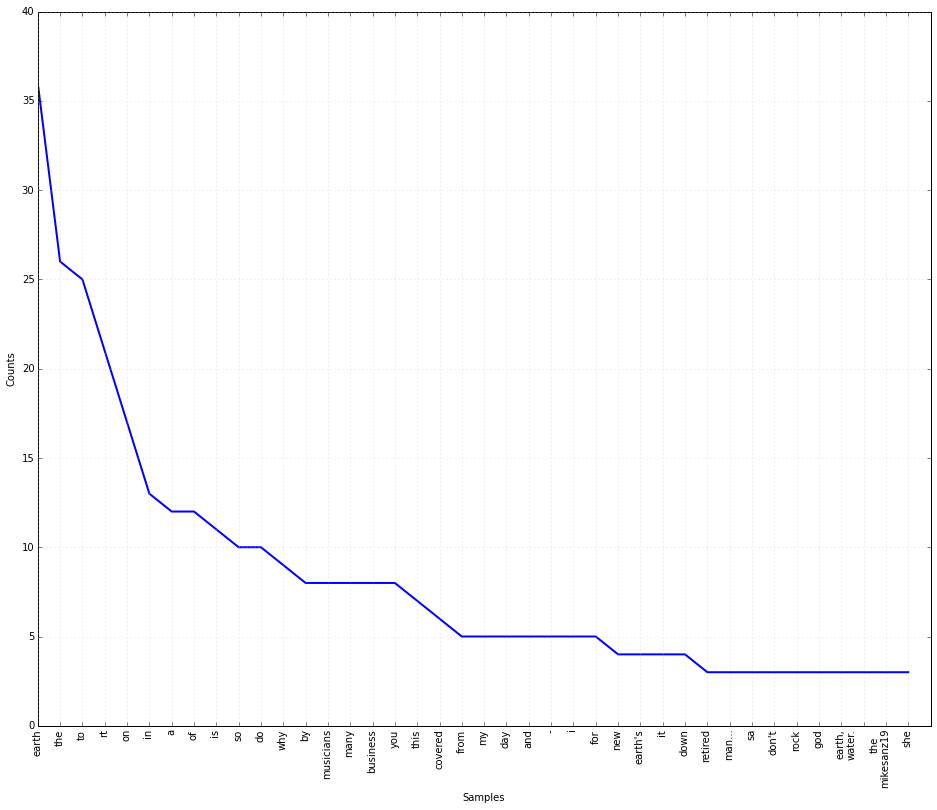

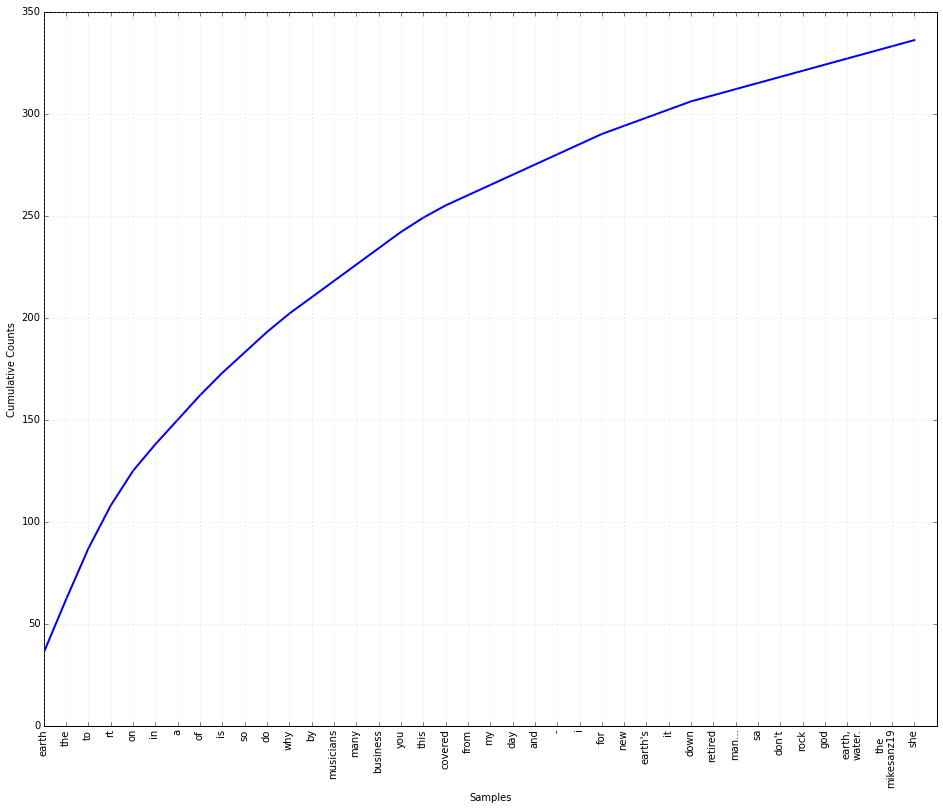

In [97]:
freq_dist = nltk.FreqDist(tweets_words)
freq_dist.plot(40)
freq_dist.plot(40, cumulative = True)

In [98]:
print('10 most frequent words')
print(freq_dist.keys()[:10])

10 most frequent words
[u'', u'all', u'lack', u'continue,', u'go', u'hate', u"\nwhere's", u'absolutely.', u'tremors', u'elizabeth']


In [99]:
print('10 less frequent words')
print(freq_dist.keys()[-10:])

10 less frequent words
[u'fell', u'\nis', u'http://t.co/cfrubmzbzl', u'#bethechange', u'age', u'youtube', u'viner', u'summit', u'sees,', u'st0nes']


In [100]:
print('Sorted list of words')
print(sorted(set(tweets_words)))

Sorted list of words
[u'', u'\n#nathaniellandingsalupa', u'\nis', u'\nthe', u"\nwhere's", u'"down', u'"earth', u'#bethechange', u'#climatechange', u'#deltadawn', u'#didgeridoo', u'#earth', u'#environment', u'#globalwarming', u'#happybirthdayluis', u'#isf', u'#mobilemarketing', u'#msg9successfulweeks', u'#planet', u'#prayer', u'#tanyatucker', u"'down", u'(2015', u'*\u0e23\u0e49\u0e2d\u0e07\u0e40\u0e1e\u0e25\u0e07\u0e21\u0e2b\u0e31\u0e19\u0e15\u0e20\u0e31\u0e22\u0e43\u0e2b\u0e49\u0e41\u0e2d\u0e23\u0e4c\u0e1f\u0e31\u0e07*', u'-', u'-isa.', u'...', u'0.2', u'12', u'16.01', u'30%', u'49:6', u'6', u'70%', u'[musician?]', u'a', u'able', u'about', u'absolutely.', u'again.', u'age', u'agentdae\u2026', u'all', u'almost', u'always', u'am', u'amp;', u'an', u'anamericangod', u'and', u'angel', u'another', u'anyone', u'are', u'as', u'asteroid', u'asteroidmisses', u'astroterry', u'at', u'australia\nhttps://t.co/fxyts5wsc1', u'back', u'bad', u'balat', u'bang', u'be', u'before', u'benvegn\xf9', u'bf\n\n

Same as before, without stopwords. See variable "ignorewords"

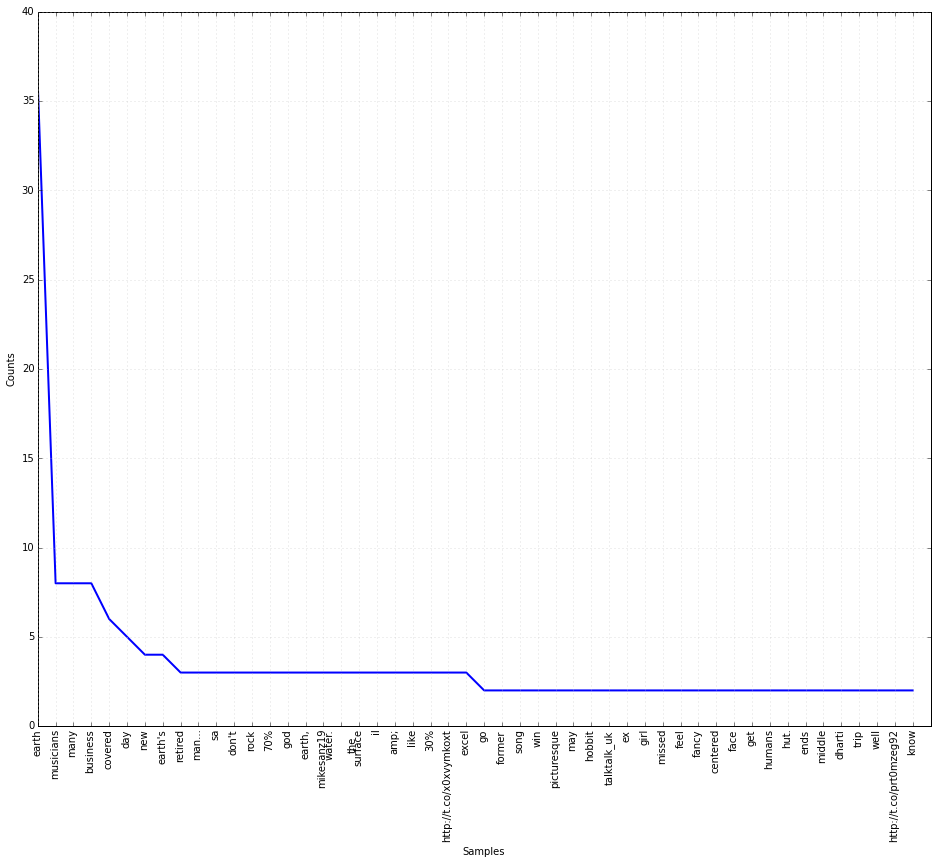

In [101]:
new_tweets_words = [word for word in tweets_words if word not in ignorewords]
    
freq_new = nltk.FreqDist(new_tweets_words)    
freq_new.plot(50)

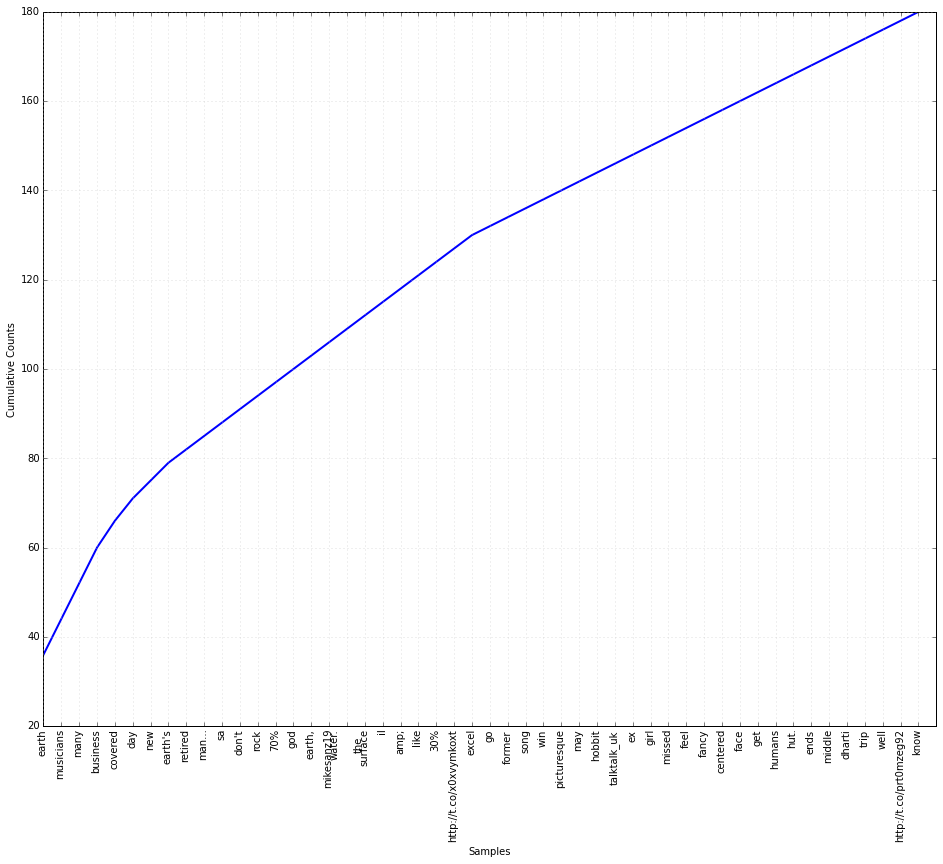

In [102]:
freq_new.plot(50, cumulative = True)

In [103]:
print('10 most frequent words')
print(freq_new.keys()[:10])

10 most frequent words
[u'lack', u'continue,', u'go', u'hate', u"\nwhere's", u'absolutely.', u'tremors', u'elizabeth', u'former', u'mmmmmmm']


In [104]:
print('10 less frequent words')
print(freq_new.keys()[-10:])

10 less frequent words
[u'fell', u'\nis', u'http://t.co/cfrubmzbzl', u'#bethechange', u'age', u'youtube', u'viner', u'summit', u'sees,', u'st0nes']


In [105]:
print('Sorted list of words')
print(sorted(set(new_tweets_words)))

Sorted list of words
[u'\n#nathaniellandingsalupa', u'\nis', u'\nthe', u"\nwhere's", u'"down', u'"earth', u'#bethechange', u'#climatechange', u'#deltadawn', u'#didgeridoo', u'#earth', u'#environment', u'#globalwarming', u'#happybirthdayluis', u'#isf', u'#mobilemarketing', u'#msg9successfulweeks', u'#planet', u'#prayer', u'#tanyatucker', u"'down", u'(2015', u'*\u0e23\u0e49\u0e2d\u0e07\u0e40\u0e1e\u0e25\u0e07\u0e21\u0e2b\u0e31\u0e19\u0e15\u0e20\u0e31\u0e22\u0e43\u0e2b\u0e49\u0e41\u0e2d\u0e23\u0e4c\u0e1f\u0e31\u0e07*', u'-isa.', u'...', u'0.2', u'12', u'16.01', u'30%', u'49:6', u'6', u'70%', u'[musician?]', u'able', u'absolutely.', u'again.', u'age', u'agentdae\u2026', u'almost', u'always', u'amp;', u'anamericangod', u'angel', u'another', u'anyone', u'asteroid', u'asteroidmisses', u'astroterry', u'australia\nhttps://t.co/fxyts5wsc1', u'back', u'bad', u'balat', u'bang', u'benvegn\xf9', u'bf\n\nomg', u'big', u'birth', u'birthday', u'bloglovin', u'bodrum', u'bra', u'brings', u'browning', u'b

Counting specific words

In [106]:
print(new_tweets_words.count(u'prova'))
print(freq_new[u'gabarito']) #same as before
print(freq_new.freq(u'cola')) #relative to the others

0
0
0.0


Eliminating small words or words with specific sizes

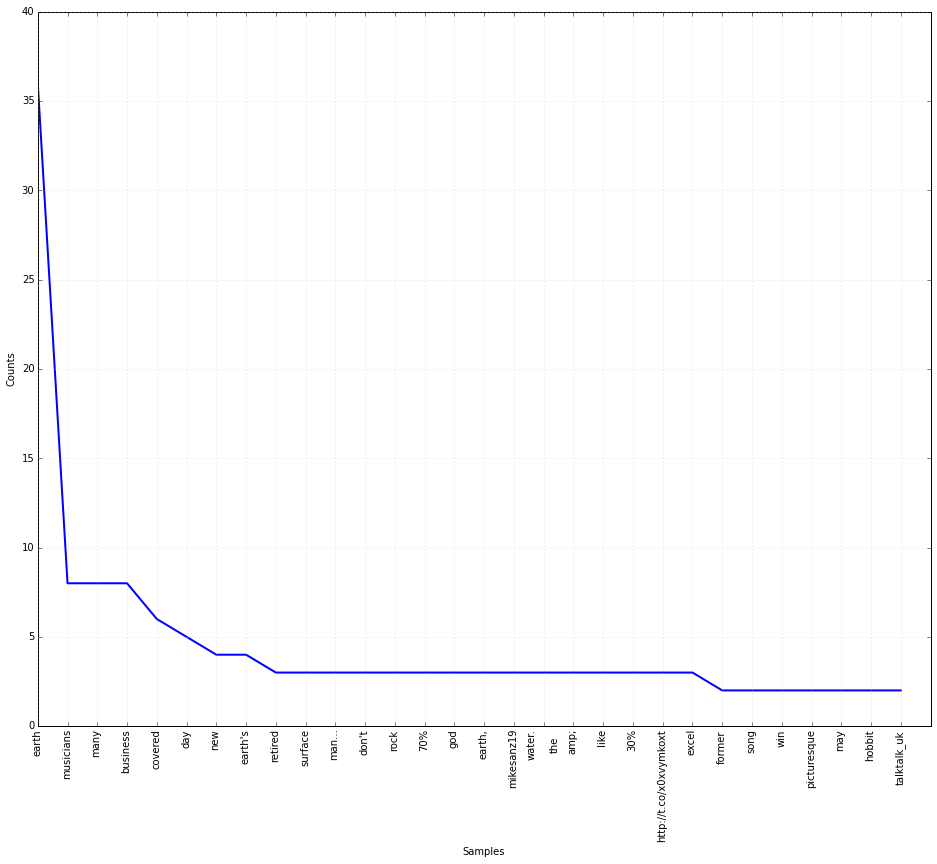

In [107]:
bigger_tweets_words = [word for word in new_tweets_words if len(word) > 2]
#mediumsized_tweets_words = [word for word in new_tweets_words if len(word) > 2 and len(word) < 9]
freq_bigger = nltk.FreqDist(bigger_tweets_words)    
freq_bigger.plot(30)

Citation Analysis

In [108]:
citacoes = [word for word in tweets_words if '@' in word]
#citacoes = [word for word in tweets_words if word.startswith('@')]
freq_citacoes = nltk.FreqDist(citacoes)
freq_citacoes.items()

[]

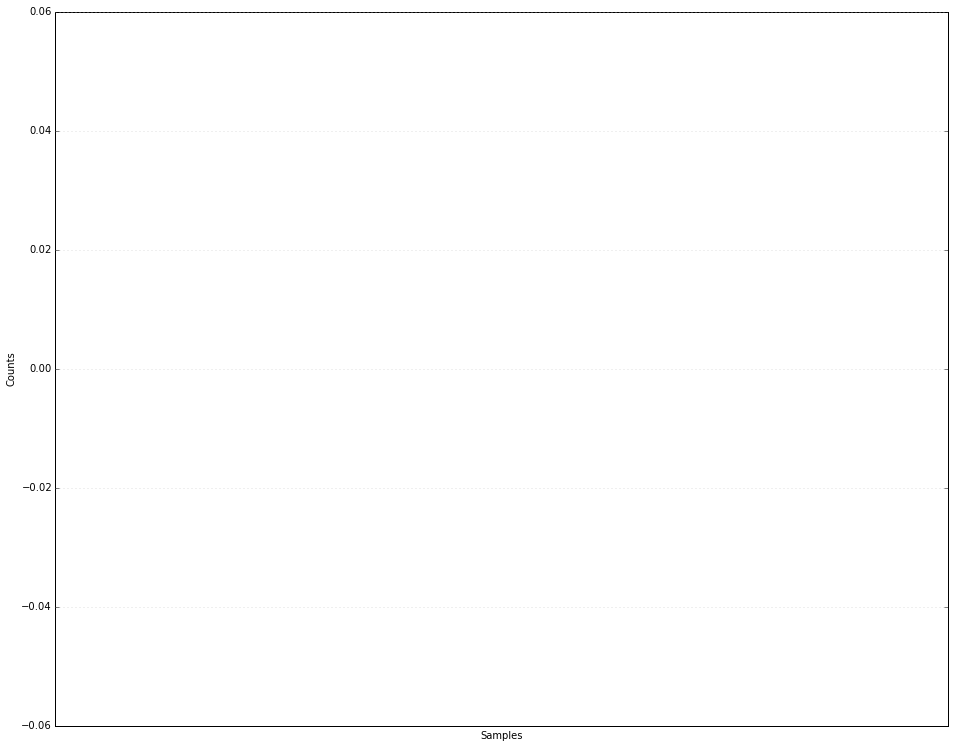

In [109]:
freq_citacoes.plot()

Hashtag Analysis

In [110]:
hashtags = [word for word in tweets_words if word.startswith('#')]
freq_hashtags = nltk.FreqDist(hashtags)
freq_hashtags.items()

[(u'#mobilemarketing', 1),
 (u'#prayer', 1),
 (u'#climatechange', 1),
 (u'#earth', 1),
 (u'#planet', 1),
 (u'#happybirthdayluis', 1),
 (u'#globalwarming', 1),
 (u'#tanyatucker', 1),
 (u'#bethechange', 1),
 (u'#environment', 1),
 (u'#isf', 1),
 (u'#msg9successfulweeks', 1),
 (u'#didgeridoo', 1),
 (u'#deltadawn', 1)]

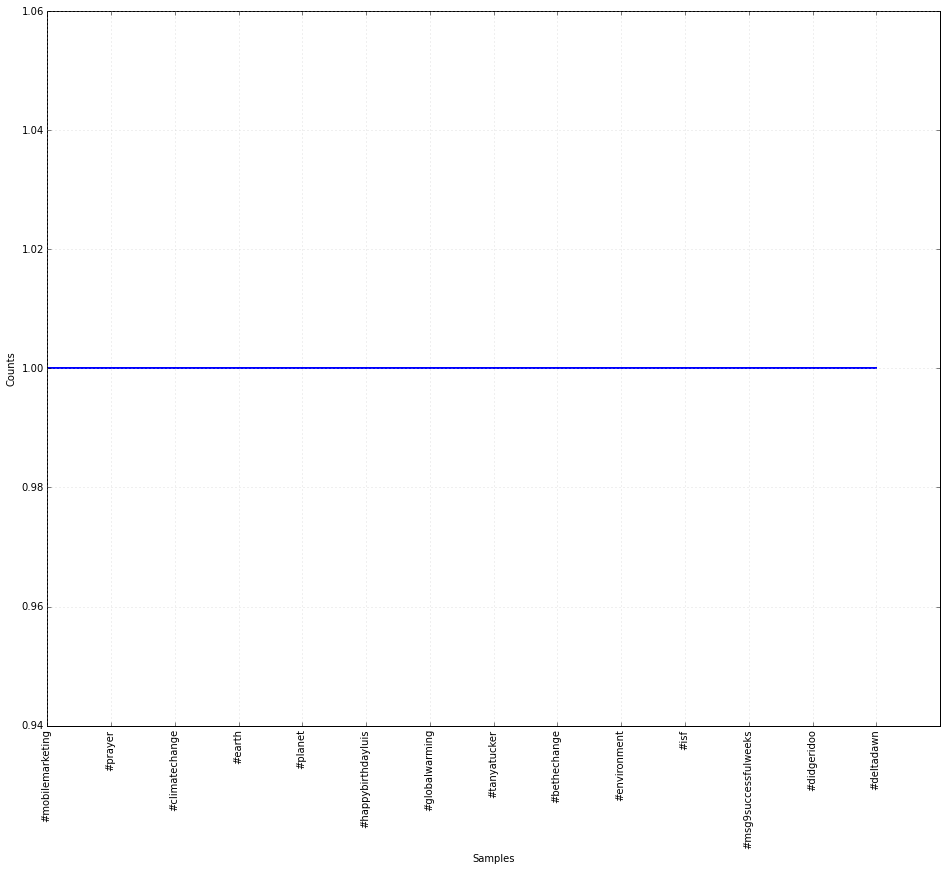

In [111]:
freq_hashtags.plot()

Analysis of Frequent words  
Can be used with any of the previous lists'''

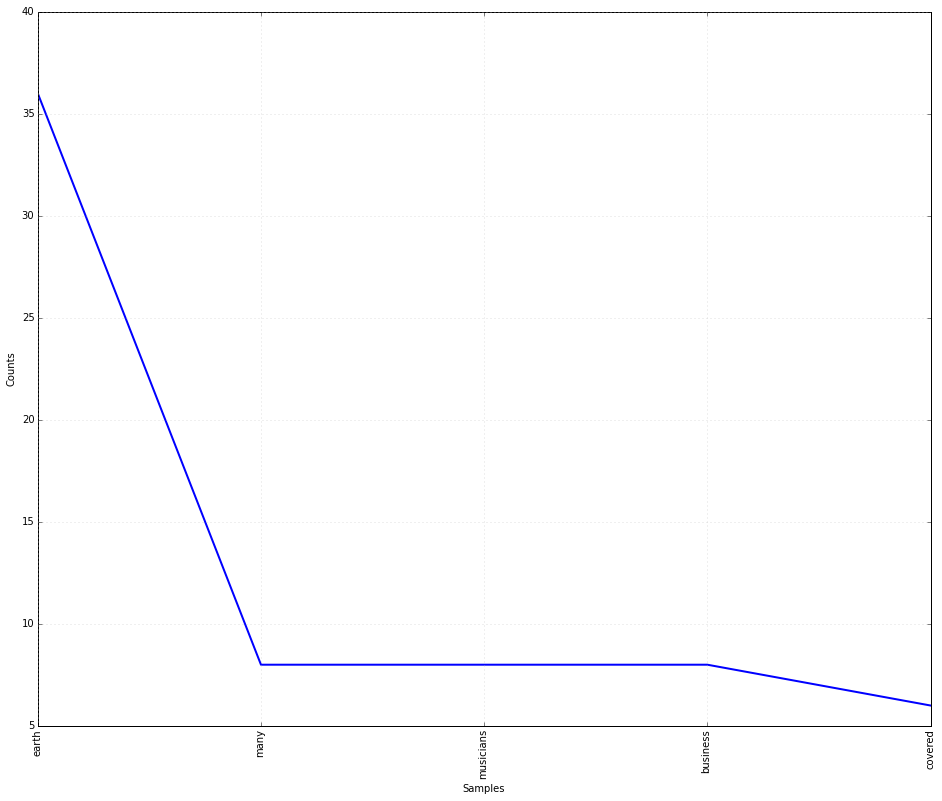

In [112]:
frequent_words = [word.lower() for word in new_tweets_words if tweets_words.count(word) > 5]
freq_dist2 = nltk.FreqDist(frequent_words)
freq_dist2.plot(40)

Words Sizes

In [113]:
freq_size_words = nltk.FreqDist([len(w) for w in new_tweets_words])
freq_size_words.items()

[(1, 5),
 (2, 20),
 (3, 52),
 (4, 82),
 (5, 91),
 (6, 56),
 (7, 41),
 (8, 33),
 (9, 23),
 (10, 11),
 (11, 16),
 (12, 9),
 (13, 6),
 (14, 7),
 (15, 2),
 (16, 1),
 (18, 1),
 (20, 1),
 (22, 29),
 (23, 3),
 (24, 2),
 (28, 1),
 (33, 1),
 (61, 1),
 (66, 1)]

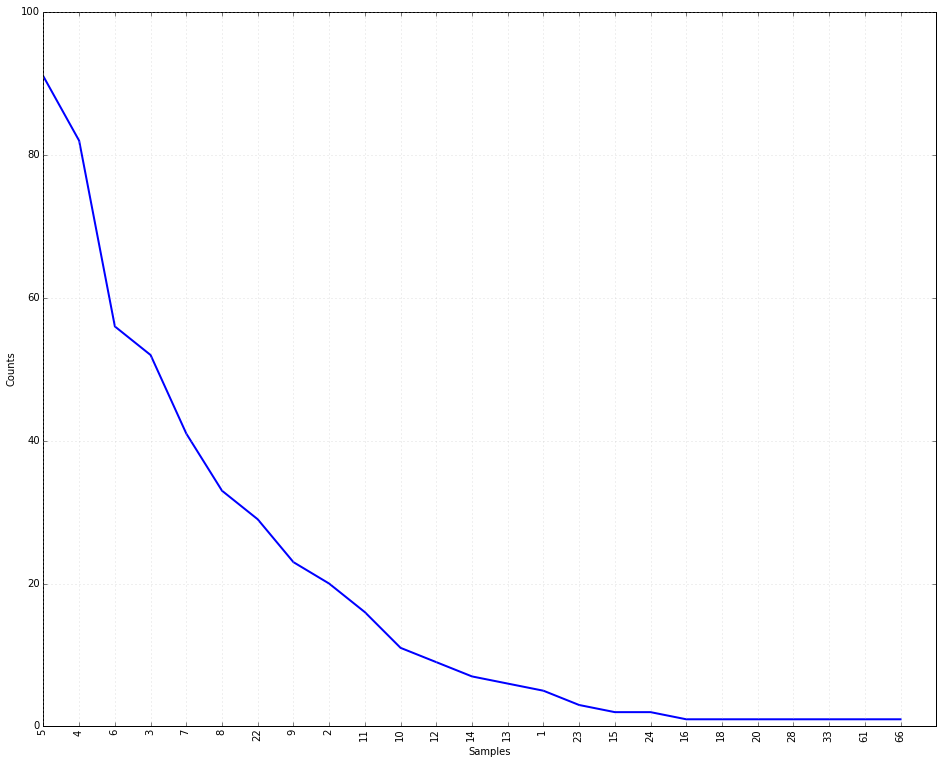

In [114]:
freq_size_words.plot()

Bigrams

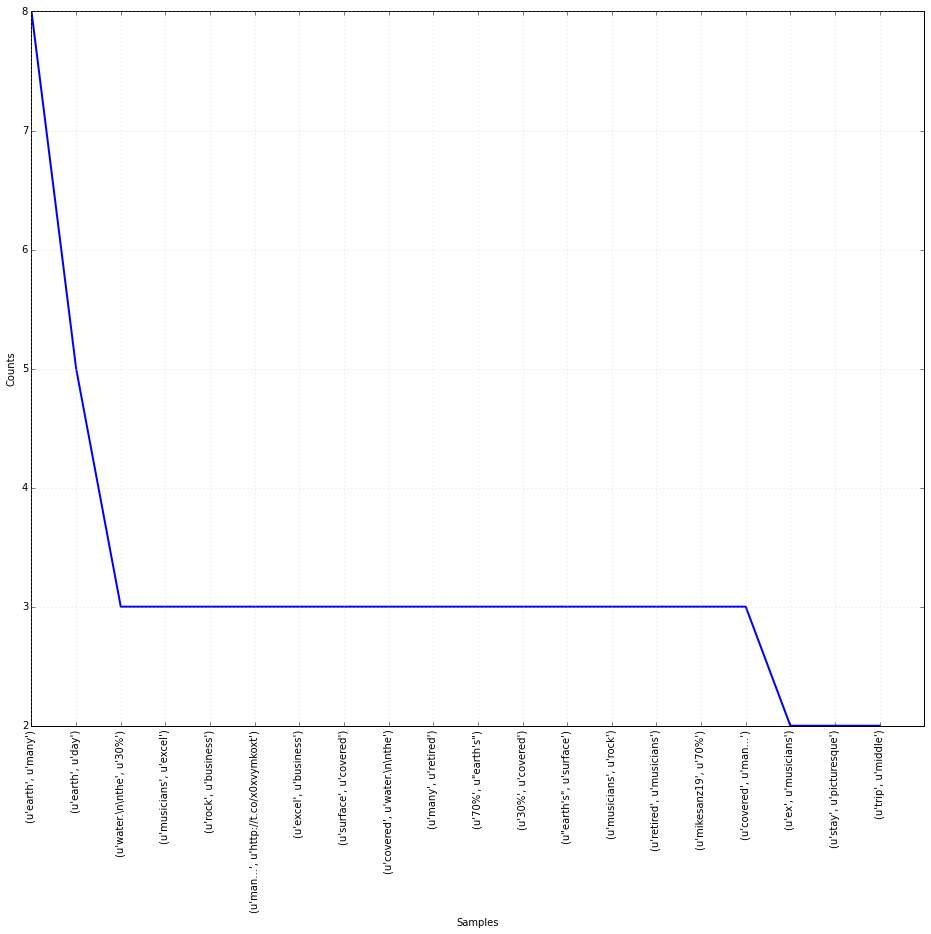

In [115]:
bigramas_tweets = nltk.bigrams(new_tweets_words)
freqbig = nltk.FreqDist(bigramas_tweets)
freqbig.plot(20)

Names (capitalized words)

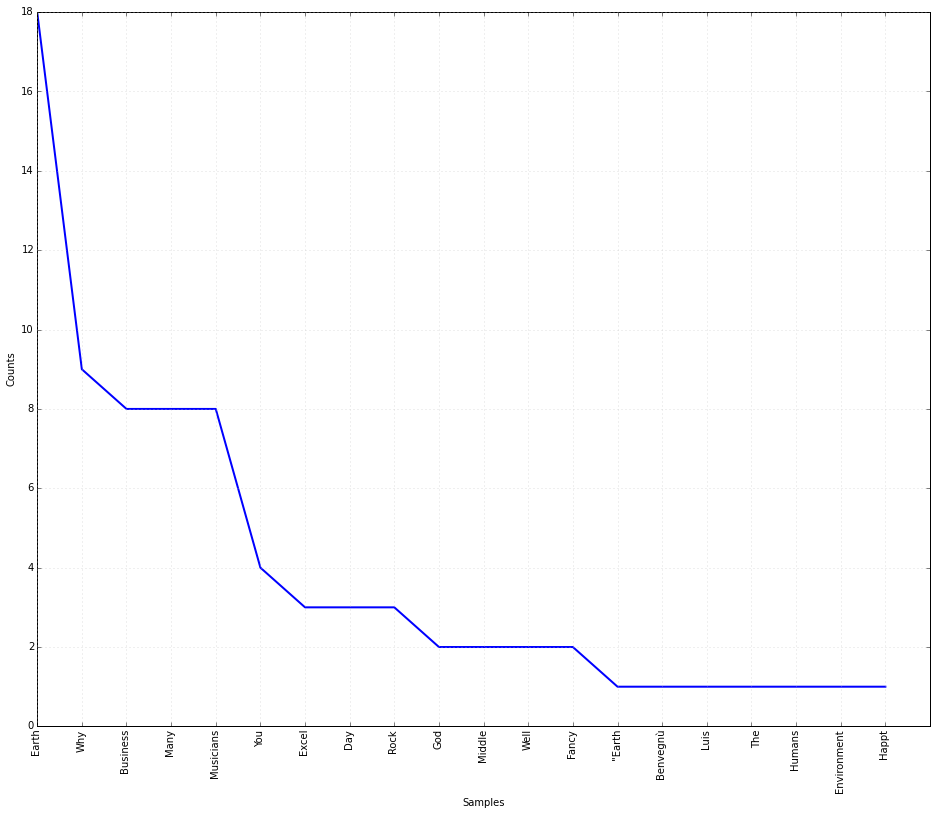

In [116]:
freq_names = nltk.FreqDist(names)
freq_names.plot(20)

#### Sentiment Analysis

In [117]:
badwords =   ['abandoned','abused','accused','addicted','afraid','aggravated',
              'aggressive','alone','angry','anguish','annoyed','anxious','apprehensive',
              'argumentative','artificial','ashamed','assaulted','at a loss','at risk',
              'atrocious','attacked','avoided','awful','awkward','bad','badgered','baffled',
              'banned','barren','beat','beaten down','belittled','berated','betrayed',
              'bitched at','bitter','bizzare','blacklisted','blackmailed','blamed','bleak',
              'blown away','blur','bored','boring','bossed-around','bothered','bothersome',
              'bounded','boxed-in','broken','bruised','brushed-off','bugged','bullied',
              'bummed','bummed out','burdened','burdensome','burned','burned-out',
              'caged in','careless','chaotic','chased','cheated','cheated on','chicken',
              'claustrophobic','clingy','closed','clueless','clumsy','coaxed',
              'codependent','coerced','cold','cold-hearted','combative','commanded',
              'compared','competitive','compulsive','conceited','concerned',
              'condescended to','confined','conflicted','confronted','confused',
              'conned','consumed','contemplative','contempt','contentious','controlled',
              'convicted','cornered','corralled','cowardly','crabby','cramped','cranky',
              'crap','crappy','crazy','creeped out','creepy','critical','criticized',
              'cross','crowded','cruddy','crummy','crushed','cut-down','cut-off','cynical',
              'damaged','damned','dangerous','dark','dazed','dead','deceived','deep',
              'defamed','defeated','defective','defenseless','defensive','defiant',
              'deficient','deflated','degraded','dehumanized','dejected','delicate',
              'deluded','demanding','demeaned','demented','demoralized','demotivated',
              'dependent','depleted','depraved','depressed','deprived','deserted',
              'deserving of pain/punishment','desolate','despair','despairing',
              'desperate','despicable','despised','destroyed','destructive',
              'detached','detest','detestable','detested','devalued','devastated',
              'deviant','devoid','diagnosed','dictated to','different','difficult',
              'directionless','dirty','disabled','disagreeable','disappointed',
              'disappointing','disapproved of','disbelieved','discardable','discarded',
              'disconnected','discontent','discouraged','discriminated','disdain',
              'disdainful','disempowered','disenchanted','disgraced','disgruntled',
              'disgust','disgusted','disheartened','dishonest','dishonorable',
              'disillusioned','dislike','disliked','dismal','dismayed','disorganized',
              'disoriented','disowned','displeased','disposable','disregarded',
              'disrespected','dissatisfied','distant','distracted','distraught',
              'distressed','disturbed','dizzy','dominated','doomed','double-crossed',
              'doubted','doubtful','down','down and out','down in the dumps',
              'downhearted','downtrodden','drained','dramatic','dread','dreadful',
              'dreary','dropped','drunk','dry','dumb','dumped','dumped on','duped',
              'edgy','egocentric','egotistic','egotistical','elusive','emancipated',
              'emasculated','embarrassed','emotional','emotionless','emotionally bankrupt',
              'empty','encumbered','endangered','enraged','enslaved','entangled','evaded',
              'evasive','evicted','excessive','excluded','exhausted','exploited','exposed',
              'fail','failful','fake','false','fear','fearful','fed up','flawed','forced',
              'forgetful','forgettable','forgotten','fragile','freaked out','frightened',
              'frigid','frustrated','furious','gloomy','glum','gothic','grey','grief','grim',
              'gross','grossed-out','grotesque','grouchy','grounded','grumpy','guilt-tripped',
              'guilty','harassed','hard','hard-hearted','harmed','hassled','hate','hateful',
              'hatred','haunted','heartbroken','heartless','heavy-hearted','helpless',
              'hesitant','hideous','hindered','hopeless','horrible','horrified','horror',
              'hostile','hot-tempered','humiliated','hung up','hung over','hurried','hurt',
              'hysterical','idiot','idiotic','ignorant','ignored','ill','ill-tempered',
              'imbalanced','imposed-upon','impotent','imprisoned','impulsive','in the dumps',
              'in the way','inactive','inadequate','incapable','incommunicative','incompetent',
              'incompatible','incomplete','incorrect','indecisive','indifferent',
              'indoctrinated','inebriated','ineffective','inefficient','inferior',
              'infuriated','inhibited','inhumane','injured','injusticed','insane',
              'insecure','insignificant','insincere','insufficient','insulted',
              'intense','interrogated','interrupted','intimidated','intoxicated',
              'invalidated','invisible','irrational','irritable','irritated',
              'isolated','jaded','jealous','jerked around','joyless','judged',
              'kept apart','kept away','kept in','kept out','kept quiet','labeled',
              'laughable','laughed at','lazy','leaned on','lectured to','left out',
              'let down','lied about','lied to','limited','little','lonely','lonesome',
              'longing','lost','lousy','loveless','low','mad','made fun of','man handled',
              'manipulated','masochistic','messed with','messed up','messy','miffed',
              'miserable','misled','mistaken','mistreated','mistrusted','misunderstood',
              'mixed-up','mocked','molested','moody','nagged','needy','negative',
              'nervous','neurotic','nonconforming','numb','nuts','nutty','objectified',
              'obligated','obsessed','obsessive','obstructed','odd','offended',
              'on display','opposed','oppressed','out of place','out of touch',
              'over-controlled','over-protected','overwhelmed','pain','panic','paranoid',
              'passive','pathetic','pessimistic','petrified','phony','picked on','pissed',
              'pissed off','plain','played with','pooped','poor','powerless','pre-judged',
              'preached to','preoccupied','predjudiced','pressured','prosecuted',
              'provoked','psychopathic','psychotic','pulled apart','pulled back',
              'punished','pushed','pushed away','put down','puzzled','quarrelsome',
              'queer','questioned','quiet','rage','raped','rattled','regret','rejected',
              'resented','resentful','responsible','retarded','revengeful','ridiculed',
              'ridiculous','robbed','rotten','sad','sadistic','sarcastic','scared',
              'scarred','screwed','screwed over','screwed up','self-centered','self-conscious',
              'self-destructive','self-hatred','selfish','sensitive','shouted at','shy',
              'singled-out','slow','small','smothered','snapped at','spiteful','stereotyped',
              'strange','stressed','stretched','stuck','stupid','submissive','suffering',
              'suffocated','suicidal','superficial','suppressed','suspicious','worse','worst'
              ,'bankrupcy','jobs','shit','socialism','#sob']

In [118]:
goodwords =  ['Abundant','Accomplished','Achieving','Active','Admirable','Adorable',
              'Adventurous','Admired','Affluent','Agreeable','Alert','Aligned','Alive',
              'Amazing','Appealing','Appreciate','Artistic','Astounding','Astute',
              'Attentive','Attractive','Auspicious','Authentic','Awake','Aware','Awesome',
              'Beaming','Beautiful','Better','Best','Blessed','Bliss','Bold','Bright','Brilliant',
              'Brisk','Buoyant','Calm','Capable','Centered','Certain','Charming',
              'Cheerful','Clear','Clever','Competent','Complete','Confident','Connected',
              'Conscious','Considerate','Convenient','Courageous','Creative','Daring',
              'Dazzling','Delicious','Delightful','Desirable','Determined','Diligent',
              'Discerning','Discover','Dynamic','Eager','Easy','Efficient','Effortless',
              'Elegant','Eloquent','Energetic','Endless','Enhancing','Engaging','Enormous'
              ,'Enterprising','Enthusiastic','Enticing','Excellent','Exceptional','Exciting'
              ,'Experienced','Exquisite','Fabulous','Fair','Far-Sighted','Fascinating',
              'Fine','Flattering','Flourishing','Fortunate','Free','Friendly','Fulfilled',
              'Fun','Generous','Genuine','Gifted','Glorious','Glowing','Good','Good-Looking',
              'Gorgeous','Graceful','Gracious','Grand','Great','Handsome','Happy','Hardy',
              'Harmonious','Healed','Healthy','Helpful','Honest','Humorous','Ideal',
              'Imaginative','Impressive','Industrious','Ingenious','Innovative','Inspired',
              'Intelligent','Interested','Interesting','Intuitive','Inventive','Invincible',
              'Inviting','Irresistible','Joyous','Judicious','Keen','Kind','Knowing','Leader',
              'Limitless','Lively','Loving','Lucky','Luminous','Magical','Magnificent',
              'Marvellous','Masterful','Mighty','Miraculous','Motivated','Natural','Neat',
              'Nice','Nurturing','Noble','Optimistic','Outstanding','Passionate','Peaceful',
              'Perfect','Persevering','Persistent','Playful','Pleasing','Plentiful','Positive',
              'Powerful','Precious','Prepared','Productive','Profound','Prompt','Prosperous',
              'Proud','Qualified','Quick','Radiant','Reasonable','Refined','Refreshing',
              'Relaxing','Reliable','Remarkable','Resolute','Resourceful','Respected',
              'Rewarding','Robust','Safe','Satisfied','Secure','Seductive','Self-Reliant',
              'Sensational','Sensible','Sensitive','Serene','Sharing','Skilful','Smart',
              'Smashing','Smooth','Sparkling','Spiritual','Splendid','Strong','Stunning',
              'Successful','Superb','Swift','Talented','Tenacious','Terrific','Thankful',
              'Thrilling','Thriving','Timely','Trusting','Truthful','Ultimate','Unique',
              'Valiant','Valuable','Versatile','Vibrant','Victorious','Vigorous','Vivacious',
              'Vivid','Warm','Wealthy','Well','Whole','Wise','Wonderful','Worthy','Young',
              'Youthful','Zeal','Zest']

In [119]:
def percentage(count, total):
    return 100 * count / float(total)

In [120]:
def sentiment_analysis(texto, goodwords, badwords):
    '''
    Not a sophisticated one, but the main idea is present.
    Please read: http://alias-i.com/lingpipe/demos/tutorial/sentiment/read-me.html
    '''
    goodness = 0
    badness = 0    
    for word in goodwords:
        goodness += percentage(texto.count(word.lower()), len(texto))
    for word in badwords:
        badness += percentage(texto.count(word.lower()), len(texto))
    if badness:
        ratio = goodness/float(badness)
    print(u'Grau de negatividade: {}'.format(badness))
    print(u'Grau de positividade: {}'.format(goodness))
    if badness:
        print(u'Razão: {}'.format(ratio))
    return goodness, badness

In [121]:
sentiment_analysis(tweets_words, goodwords, badwords);

Grau de negatividade: 0.892857142857
Grau de positividade: 0.637755102041
Razão: 0.714285714286


#### Geographic Analysis

https://pypi.python.org/pypi/basemap/1.0.7  
http://matplotlib.org/basemap/  
http://matplotlib.org/basemap/users/installing.html  
http://nbviewer.ipython.org/github/ehmatthes/intro_programming/blob/master/notebooks/visualization_earthquakes.ipynb  

In [122]:
#http://matplotlib.org/basemap/api/basemap_api.html
from mpl_toolkits.basemap import Basemap

In [152]:
msgpublicas = api.GetStreamSample()
geo_points = 0
lats, lons = [], []
users = []
while geo_points < 20:
    tweet = msgpublicas.next()
    if tweet.has_key('coordinates') and tweet['coordinates'] != None:
        coords = tweet['coordinates']['coordinates']
        user = tweet['user']['id']
        print(u'Usuário {} nas coordenadas {}'.format(user, [coords[1],coords[0]]))
        lons.append(float(coords[0]))
        lats.append(float(coords[1]))
        users.append(user)
        geo_points +=1

Usuário 2981503901 nas coordenadas [48.078101, -1.714642]
Usuário 2749217533 nas coordenadas [25.461638, 68.72067]
Usuário 3065323635 nas coordenadas [36.874384, 30.727493]
Usuário 3056100616 nas coordenadas [38.130911, 13.293444]
Usuário 1466027521 nas coordenadas [29.562756, -95.295386]
Usuário 1129228170 nas coordenadas [40.232113, 33.042033]
Usuário 2639428014 nas coordenadas [-38.731191, -62.292832]
Usuário 418853247 nas coordenadas [29.26135, 48.066069]
Usuário 314629422 nas coordenadas [38.400003, 26.98981]
Usuário 1607302489 nas coordenadas [52.695367, 5.18513]
Usuário 2970116956 nas coordenadas [-23.654425, -46.447525]
Usuário 1614268472 nas coordenadas [29.28819, 48.024323]
Usuário 887649678 nas coordenadas [-23.751501, -46.667282]
Usuário 1106516731 nas coordenadas [2.771881, 101.759843]
Usuário 2234886092 nas coordenadas [-33.755018, -61.953575]
Usuário 2305370347 nas coordenadas [53.445191, -2.932525]
Usuário 2455783144 nas coordenadas [-34.463791, -58.577754]
Usuário 1538

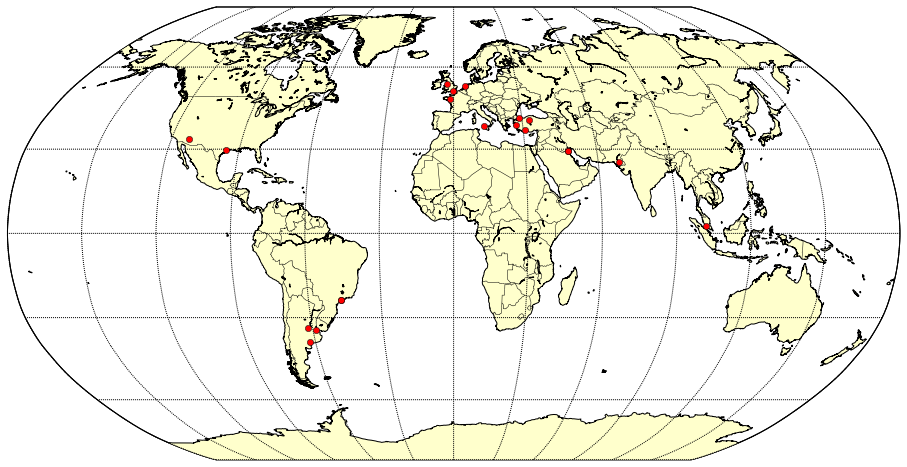

In [153]:
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0, lat_0=0, lon_0=0)

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = '#FFFFCC') #http://www.w3schools.com/tags/ref_colorpicker.asp
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

x,y = map(lons, lats)
map.plot(x, y, 'ro', markersize=6)
plt.show()

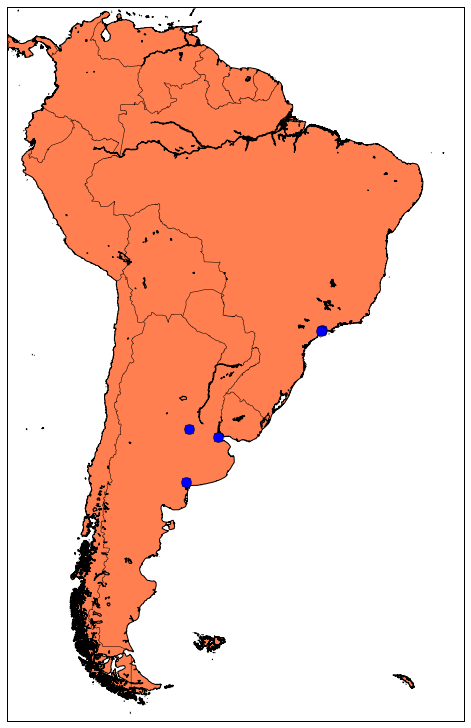

In [154]:
map = Basemap(projection='merc', lat_0 = -22, lon_0 = -56.5,resolution = 'h', area_thresh = 0.1, 
              llcrnrlon=-83.0, llcrnrlat=-57.0, urcrnrlon=-30.0, urcrnrlat=13.0)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()

x,y = map(lons, lats)
map.plot(x, y, 'bo', markersize=10)

plt.show()

Zoom em uma coordenada:

In [155]:
def gmap(lat,lon,zoom=10):
    # Google Maps URL template for an iframe
    google_maps_url = "http://maps.google.com/maps?q={0}+{1}&ie=UTF8&t=h&z={2}&{0},{1}&output=embed".format(lat,lon,zoom)
    display(IFrame(google_maps_url, '800px', '600px'))

In [156]:
gmap(lats[0],lons[0],4)

#### Graphs

In [129]:
def get_rt_origins(tweet):
    ''' Regex adapted from 
    http://stackoverflow.com/questions/655903/python-regular-expression-for-retweets'''
    rt_patterns = re.compile(r"(RT|via)((?:\b\W*@\w+)+)", re.IGNORECASE)
    rt_origins = []
    try:
        rt_origins += [mention.strip() for mention in rt_patterns.findall(tweet)[0][1].split()]
    except IndexError, e:
        pass
    return [rto.strip("@") for rto in rt_origins]

In [130]:
def create_graph_retweets(tweets):
    g = nx.DiGraph()
    for tweet in tweets:
        rt_origins = get_rt_origins(tweet.text)
        if not rt_origins:
            continue
        for rt_origin in rt_origins:
            g.add_edge(rt_origin, tweet.user.screen_name, {'tweet_id': tweet.id})
    return g

In [131]:
g_rt = create_graph_retweets(tweets)
print("Number of nodes is: {}\n".format(g_rt.number_of_nodes()))
print("Number of edges is: {}\n".format(g_rt.number_of_edges()))

Number of nodes is: 36

Number of edges is: 20



In [132]:
import operator
sorted_dic = sorted(g_rt.degree().items(), key=operator.itemgetter(1), reverse=True)
sorted_dic

[(u'mikesanz19', 3),
 (u'TalkTalk_UK', 2),
 (u'ADORABLE_EARTH', 2),
 (u'CHOCOOLIIE', 1),
 (u'jasmer_insan', 1),
 (u'AstroTerry', 1),
 (u'Murvish11', 1),
 (u'HEwokVoice', 1),
 (u'yukakoyamagishi', 1),
 (u'Magdalenalovisa', 1),
 (u'TheFunnyTeens', 1),
 (u'anamericangod', 1),
 (u'YouTube', 1),
 (u'AsteroidMisses', 1),
 (u'IKW_Official', 1),
 (u'dianemartin545', 1),
 (u'jonimettala', 1),
 (u'ohlordhes', 1),
 (u'SharoneDlamini', 1),
 (u'sumantapradha12', 1),
 (u'AgentDaeche', 1),
 (u'gooner_saad', 1),
 (u'rizwanimaan123', 1),
 (u'C_X_', 1),
 (u'ShahAfridi100', 1),
 (u'DannyBeegie', 1),
 (u'ST0NES', 1),
 (u'dwade575', 1),
 (u'Earth_Jeerakrit', 1),
 (u'penewax', 1),
 (u'ElfuzoSinZu', 1),
 (u'LXVINGMALIK', 1),
 (u'neuralwiles', 1),
 (u'_JakeGear', 1),
 (u'SonaMandeep', 1),
 (u'prayerbullets', 1)]

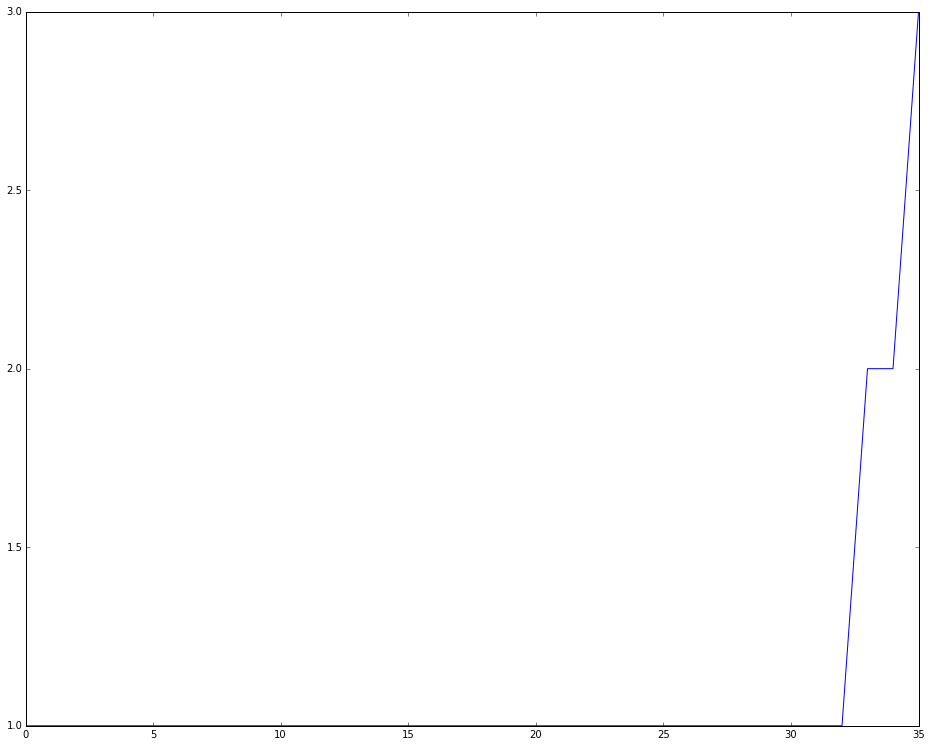

In [133]:
dic = nx.degree(g_rt)
plt.plot(sorted(dic.values()))

In [134]:
def save_dotfile(g):
    try:
        nx.drawing.write_dot(g, pathdotfile)
        print >> sys.stderr, 'Graph exported for file: {}'.format(pathdotfile)
    except (ImportError, UnicodeEncodeError): 
        # Este bloco serve para usuarios de windows, que certamente terao problemas
        # com o metodo nx.drawing.write_dot. Tambem serve para os casos em que temos
        # problemas com o unicode
        dot = [u'"{}" -> "{}" [tweet_id={}]'.format(n1, n2, g[n1][n2]['tweet_id']) for (n1, n2) in g.edges()]
        f = codecs.open(pathdotfile, 'w', encoding='utf-8')
        f.write('''strict digraph {{}}'''.format(';\n'.join(dot), ))
        f.close()
        print >> sys.stderr, 'Graph exported for file: {}'.format(pathdotfile)
        return f.name

In [135]:
save_dotfile(g_rt)

Graph exported for file: /home/rsouza/Dropbox/Renato/ModMinDados/outputs/graph_retweet.dot


Saving a dotfile

Obs: To generate a png graph from the dotfile, type in the Unix Prompt: 
'circo -Tpng -Gcharset=latin1 -Ograph_retweet graph_retweet.dot'

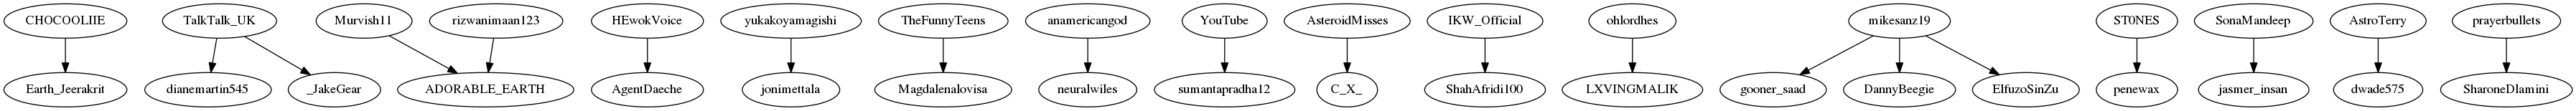

In [136]:
#Chamando um programa externo ao Ipython com o operador !
!dot -Tpng /home/rsouza/Dropbox/Renato/ModMinDados/outputs/graph_retweet.dot -o /home/rsouza/Dropbox/Renato/ModMinDados/outputs/graph_retweet.png
Image(pathpngfile)

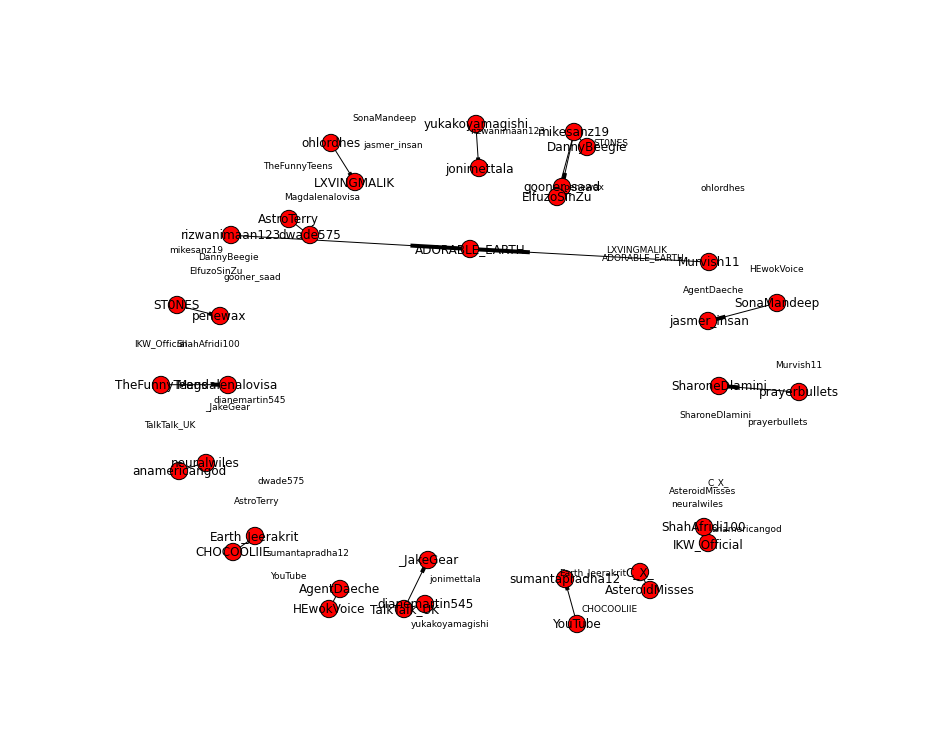

In [137]:
nx.draw_networkx_labels(g_rt,pos=nx.spring_layout(g_rt),font_size=9)
nx.draw(g_rt)
#nx.draw_random(g_rt)
#nx.draw_circular(g_rt)
#nx.draw_spectral(g_rt)

Saving a HTML file that uses javascript for visualizing the graph (needs a template)

In [138]:
def save_protovis_file(g):
    '''A visualization alternative is "protovis" javascript
    It uses the files "template_protoviz.html and "protovis-r3.2.js"
    '''
    nodes = g.nodes()
    indexed_nodes = {}
    idx = 0
    for n in nodes:
        indexed_nodes.update([(n, idx,)])
        idx += 1
    links = []
    for n1, n2 in g.edges():
        links.append({'source': indexed_nodes[n2],'target': indexed_nodes[n1]})
    json_data = json.dumps({"nodes" : [{"nodeName" : n} for n in nodes], "links" : links}, indent=4)
    html = open(pathtemplate).read().format(json_data,)
    f = open(pathprotofile, 'w')
    f.write(html)
    f.close()
    print >> sys.stderr, 'Graph exported for file: {}'.format(pathprotofile)
    return f.name, html

In [139]:
s = save_protovis_file(g_rt)

Graph exported for file: /home/rsouza/Dropbox/Renato/ModMinDados/outputs/graph_retweet.html


In [157]:
#!chromium /home/rsouza/Dropbox/Renato/ModMinDados/outputs/graph_retweet.html
webbrowser.open(os.path.join('file://', pathprotofile))

True

#### Visualizing with Ubigraph  

http://ubietylab.net/ubigraph/  
http://docs.python.org/library/xmlrpclib.html  
The package is quite old and is not being mantained. I left the code here just as an example for the brave!  

In [141]:
#import xmlrpclib
#import ubigraph
#ubiServer = "http://127.0.0.1:20738/RPC2"

In [142]:
def showing_in_ubigraph(graph, vstyles=[],estyles=[]):
    """
    Dynamic visualization using Ubigraph. Server should be
    running in the URL "ubiServer"
    graph.edges is a list of tuples: (n1,n2,w)
    """
    U = ubigraph.Ubigraph(URL=ubiServer)
    U.clear()
    nodes = {}
    edges = set([])
    #maxw = float(max(np.array([i[2] for i in graph.edges()]))) #largest weight
    if not vstyles:
        vstyles = cycle([U.newVertexStyle(id=1,shape="sphere", color="#ff0000")])
    else:
        vstyles = cycle(vstyles)
    rt_style = U.newVertexStyle(id=2,shape="sphere", color="#00ff00")
    for e in graph.edges():
        if e[0] not in nodes:
            n1 = U.newVertex(style=vstyles.next(), label=str(e[0]))#.decode('latin-1'))
            nodes[e[0]] = n1
        else:
            n1 = nodes[e[0]]
        if e[1] not in nodes:
            n2 = U.newVertex(style=rt_style, label=str(e[1]))
            nodes[e[1]] = n2
        else:
            n2 = nodes[e[1]]
        #es = e[2]/maxw
        if (n1,n2) not in edges:
            #U.newEdge(n1,n2,spline=True,strength=es, width=2.0, showstrain=True)
            U.newEdge(n1,n2,spline=True, width=2.0, showstrain=True)
            edges.add((n1,n2))
            edges.add((n2,n1))